In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, accuracy_score
from imblearn.over_sampling import SMOTE

Epoch 1/100
15/15 [==============================] - 8s 61ms/step - loss: 1.5011 - accuracy: 0.6614 - val_loss: 1.3397 - val_accuracy: 0.6321
Epoch 2/100
15/15 [==============================] - 0s 8ms/step - loss: 1.0254 - accuracy: 0.7238 - val_loss: 1.1083 - val_accuracy: 0.6321
Epoch 3/100
15/15 [==============================] - 0s 8ms/step - loss: 0.8923 - accuracy: 0.7238 - val_loss: 0.9950 - val_accuracy: 0.6321
Epoch 4/100
15/15 [==============================] - 0s 8ms/step - loss: 0.8854 - accuracy: 0.7238 - val_loss: 0.9963 - val_accuracy: 0.6321
Epoch 5/100
15/15 [==============================] - 0s 8ms/step - loss: 0.8636 - accuracy: 0.7249 - val_loss: 1.0066 - val_accuracy: 0.6321
Epoch 6/100
15/15 [==============================] - 0s 8ms/step - loss: 0.8538 - accuracy: 0.7238 - val_loss: 0.9671 - val_accuracy: 0.6321
Epoch 7/100
15/15 [==============================] - 0s 8ms/step - loss: 0.8548 - accuracy: 0.7270 - val_loss: 1.0157 - val_accuracy: 0.6321
Epoch 8/100


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


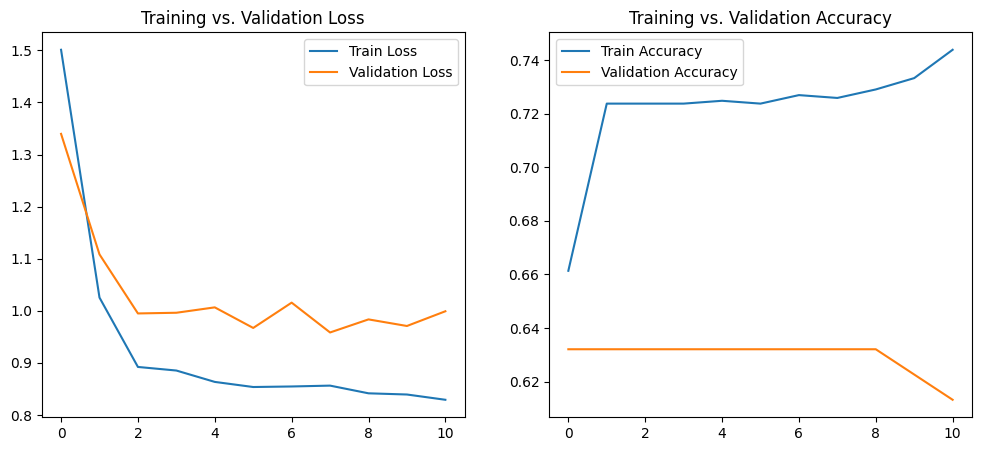

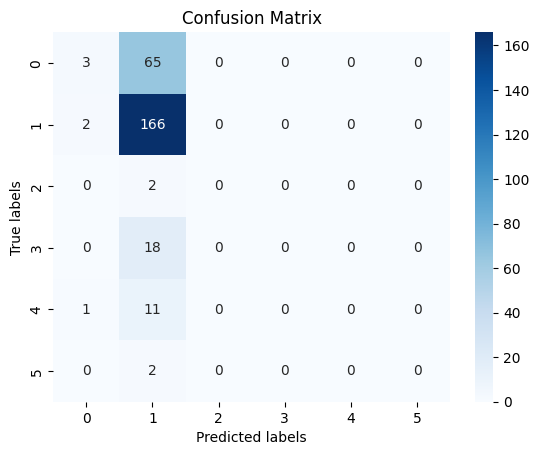

In [ ]:


# Load the data
data = pd.read_csv('filtered_input_matrix.csv')

# Prepare the features and labels
X_flat = data.iloc[:, :-1].values  # excluding the last column
y = data.iloc[:, -1].values  # the last column is the target

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_flat_resampled, y_resampled = smote.fit_resample(X_flat, y_encoded)

# Reshape X to (num_samples, 9, 3) AFTER applying SMOTE
X_resampled = X_flat_resampled.reshape(-1, 9, 3)
y_categorical = to_categorical(y_resampled)

# Now, you split your data into training, validation, and testing sets.
X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y_categorical, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Model definition
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(9, 3)),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(6, activation='softmax')
])


# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=64,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping]
)

# Evaluation on test data
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)
metrics = precision_recall_fscore_support(y_true, y_pred, average='weighted')
accuracy = accuracy_score(y_true, y_pred)

# Printing evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {metrics[0]}")
print(f"Recall: {metrics[1]}")
print(f"F1 Score: {metrics[2]}")

# Plotting training and validation loss and accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training vs. Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training vs. Validation Accuracy')
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

Epoch 1/100
15/15 [==============================] - 4s 61ms/step - loss: 1.5631 - accuracy: 0.5779 - val_loss: 1.1196 - val_accuracy: 0.7071
Epoch 2/100
15/15 [==============================] - 0s 9ms/step - loss: 1.0400 - accuracy: 0.6959 - val_loss: 0.9272 - val_accuracy: 0.7071
Epoch 3/100
15/15 [==============================] - 0s 8ms/step - loss: 0.9574 - accuracy: 0.6959 - val_loss: 0.8955 - val_accuracy: 0.7071
Epoch 4/100
15/15 [==============================] - 0s 8ms/step - loss: 0.9321 - accuracy: 0.6959 - val_loss: 0.8883 - val_accuracy: 0.7071
Epoch 5/100
15/15 [==============================] - 0s 9ms/step - loss: 0.9215 - accuracy: 0.6959 - val_loss: 0.8838 - val_accuracy: 0.7071
Epoch 6/100
15/15 [==============================] - 0s 9ms/step - loss: 0.9147 - accuracy: 0.6959 - val_loss: 0.8820 - val_accuracy: 0.7071
Epoch 7/100
15/15 [==============================] - 0s 9ms/step - loss: 0.9124 - accuracy: 0.6959 - val_loss: 0.8768 - val_accuracy: 0.7071
Epoch 8/100


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


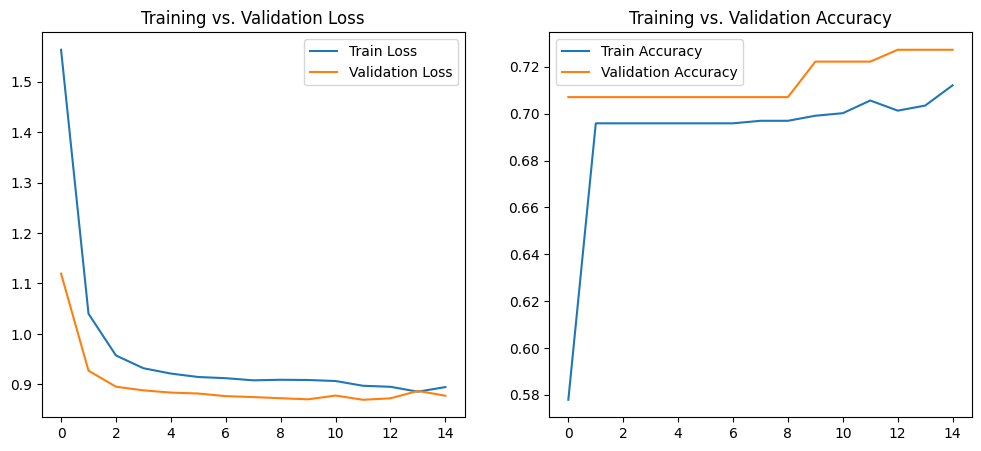

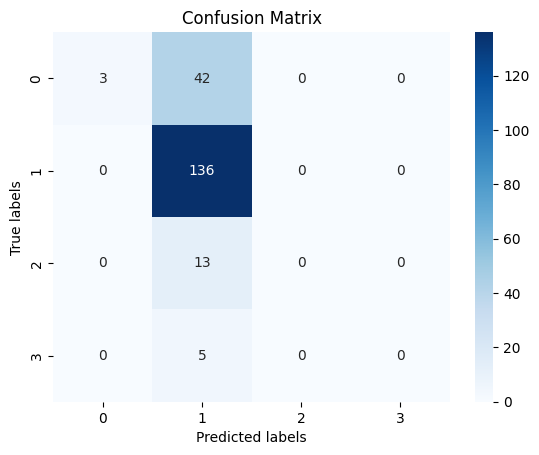

In [ ]:
# NO SMOTE

# Load the data
data = pd.read_csv('filtered_input_matrix.csv')

# Prepare the features and labels
X = data.iloc[:, :-2].values.reshape(-1, 9, 3)  # Reshape X to (num_samples, 9, 3)
y = data.iloc[:, -2].values  # the last column is the target

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Split your data into training, validation, and testing sets.
X_train, X_temp, y_train, y_temp = train_test_split(X, y_categorical, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Model definition
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(9, 3)),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(6, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=64,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping]
)

# Evaluation on test data
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)
metrics = precision_recall_fscore_support(y_true, y_pred, average='weighted')
accuracy = accuracy_score(y_true, y_pred)

# Printing evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {metrics[0]}")
print(f"Recall: {metrics[1]}")
print(f"F1 Score: {metrics[2]}")

# Plotting training and validation loss and accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training vs. Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training vs. Validation Accuracy')
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
y_dum = [5]*len(y_true)
y_dum2 = np.random.randint(0, 6, size=len(y_true))

model_accuracy = accuracy_score(y_true, y_pred)
base_accuracy = accuracy_score(y_true,y_dum)
base_random_accuracy = accuracy_score(y_true,y_dum2)

# print("Our model accuracy:",  model_accuracy)
print("Duplicates base model accuracy:", base_accuracy)
print("Random base model accuracy:", base_random_accuracy)

Duplicates base model accuracy: 0.1646433990895296
Random base model accuracy: 0.16084977238239756
